In [1]:
import numpy as np
import pandas as pd
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

warnings.filterwarnings("ignore")

In [2]:
file_path = "merged_CICIDS2017.csv"
data = pd.read_csv(file_path)

In [3]:
# Display basic dataset information
print("Original Dataset shape:", data.shape)

Original Dataset shape: (2830743, 79)


In [4]:
# Handle Missing Values
missing_values = data.isnull().sum()
print("Missing values per column:\n\n", missing_values)

# Fill missing values with the median for numerical columns
data = data.fillna(data.median())

# Remove duplicates
data = data.drop_duplicates()
print("Dataset shape after removing duplicates:", data.shape)

# Inspect column names to identify the correct target column
print("Column names in the dataset:", data.columns)

# Strip any leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Set the correct target column name
target_column = "Label"

# Encode target labels
label_encoder = LabelEncoder()
data[target_column] = label_encoder.fit_transform(data[target_column])


Missing values per column:

  Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64
Dataset shape after removing duplicates: (2522362, 79)
Column names in the dataset: Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Ma

In [5]:
# Separate features and target
X = data.drop(columns=[target_column])  # Features
y = data[target_column]                # Target

In [6]:
# Check for infinity or very large values
print("Contains Inf values:", np.isinf(X).any().any())
print("Contains NaN values:", np.isnan(X).any().any())

Contains Inf values: True
Contains NaN values: False


In [7]:
# Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with column mean (or median)
X.fillna(X.mean(), inplace=True)

In [8]:
print("Contains Inf values (after fix):", np.isinf(X).any().any())
print("Contains NaN values (after fix):", np.isnan(X).any().any())

Contains Inf values (after fix): False
Contains NaN values (after fix): False


In [ ]:
# Random Forest

Top 10 Features by Variance Threshold:
['Flow Duration', 'Fwd IAT Total', 'Bwd IAT Total', 'Flow Bytes/s', 'Fwd IAT Max', 'Flow IAT Max', 'Idle Max', 'Idle Mean', 'Idle Min', 'Fwd Header Length']
Accuracy: 0.9958782041709561
Precision: 0.995028788058405
Recall: 0.9958782041709561
F1 Score: 0.9950647257562761


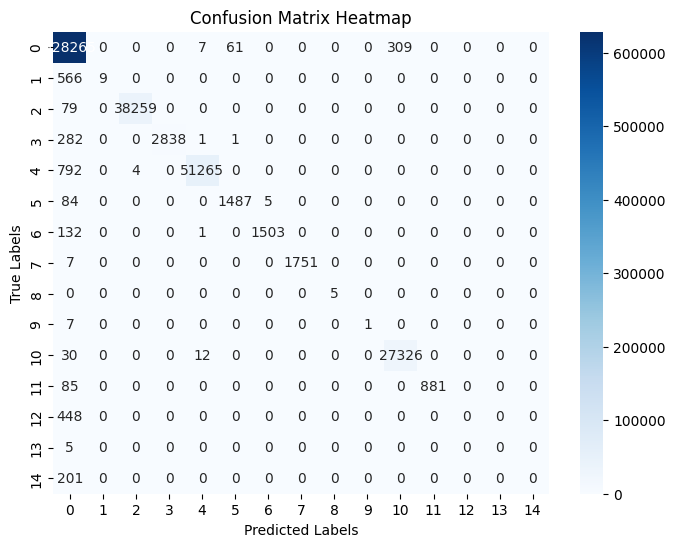

In [11]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set a threshold for minimum variance
threshold = 0.01  # Adjust based on your dataset
variance_selector = VarianceThreshold(threshold=threshold)

# Fit and transform the dataset
X_selected = variance_selector.fit_transform(X)

# Get selected feature names
selected_features = X.columns[variance_selector.get_support()]

# Print top 10 features by variance
feature_variances = pd.Series(X.var(axis=0), index=X.columns)
top_features_by_variance = feature_variances.sort_values(ascending=False).head(10)
print("Top 10 Features by Variance Threshold:")
print(top_features_by_variance.index.to_list())

# Split the transformed dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make Predictions
y_pred = rf_classifier.predict(X_test)

# Compute Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Display Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [ ]:
# AdaBoost 

Accuracy: 0.891169524876802
Precision: 0.8070151407747069
Recall: 0.891169524876802
F1 Score: 0.8461766553620255


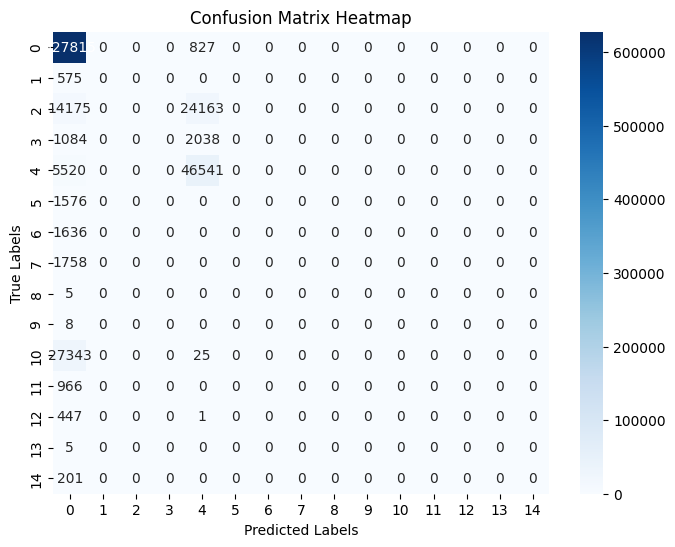

In [14]:
# Train adaboost classifier
ada_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_classifier.fit(X_train, y_train)

# Predictions and evaluation metrics
y_pred = ada_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Display metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()
